## Data Visualization

## 1. Read Data

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import read_data as rd
import numpy as np
import seaborn as sns
from IPython.display import Image
import pandas as pd

# file name
train = 'train.csv'
test = 'test.csv'

# read data
rows, rows_train, rows_test = rd.get_all_rows(train, test)

# process data
city_names = rd.scan_city_name(rows)
city_groups = rd.scan_city_group(rows)
types = rd.scan_type(rows)

# print 'citys = %s, %s ' % (len(city_names), city_names)
# print 'city group = %s, %s ' % (len(city_groups), city_groups)
# print 'types = %s, %s ' % (len(types), types)

train_header = rd.read_csv_header(train)
test_header = rd.read_csv_header(test)
train_header = train_header[1:len(train_header)]
test_header = test_header[1:len(test_header)]

# tranfrom data to numeric types
rows_train = rd.transform_data(rows_train, city_names, city_groups, types)
rows_test = rd.transform_data(rows_test, city_names, city_groups, types)

# convert to float type
rows_train = np.array(rows_train, dtype = float)
rows_test = np.array(rows_test, dtype = float)

# seperate train data and train label
X_train = rows_train[:, 1:len(rows_train[0])-1]
y_train = rows_train[:, len(rows_train[0])-1]

# transform data to pandas format
pd_all_train = pd.DataFrame(rows_train[:, 1:len(rows_train[0])], columns=train_header)

## 2. Correlation Between Features

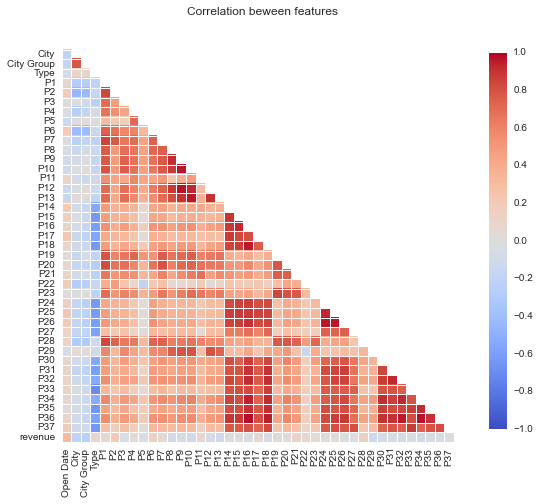

In [10]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(pd_all_train, annot=False, 
             diag_names=False)
plt.title('Correlation beween features')
plt.show()